<div style="background-color:#224256;padding:14px">
<p style="text-align:center"><font size="12px" color="#ed8e0f" face="Product Sans"><b>ATM_Transaction-data_analysis Using ANN</b>
</font> </p>
</div>

# **ATM Transaction data:**
It is quite obvious that daily cash withdrawal amounts are time series. Therefore, in this typical cash demand forecast model we will present time series and regression machine learning models to troubleshoot the above use case. We will work on the demand for a single ATM (a group of ATMs can also be worked on that is treated as a single ATM) to develop a model for the given data set. We have to remember that cash withdrawals from an ATM are not only time dependent. There could be seasonality, e.g. people will have a tendency to withdraw money on Friday for the weekend or end of the month when people get their salaries or between 7–10th days of each month some people get their pension. Therefore, developing a cash demand forecasting model for an ATM network is a challenging task. Also, the chronological cash demand for every ATM fluctuates with time and is often superimposed with non-stationary behavior of users.

### Dataset:
The dataset is in the form of a csv file and the link to download is given below:
Link: https://drive.google.com/file/d/1F01_6rHPMM4akKiP6fyUX8GETC0hTnAd/view?usp=sharing




# Dataset description:
- The dataset has 2244 entries with 11 features: 
- Id: This column having all unique values.
- atm_name: This column holds only one entry ‘Mount road ATM’ 
- weekday: This column gives the information days.
- festival_religion: This column having information about religion festival 'NH', 'H', 'N', 'M', 'C'.NH: No Holiday,H: Holiday,N: National Holiday,M: Major Festival,C: Cultural Festival
- working_day: It has 2 values H- holiday W-working day.
- holiday_sequence: Holiday sequence 'WWW', 'WHH', 'HHW', 'HWW', 'WWH', 'HHH', 'WHW', 'HWH'.
-- WWW: Working Day, Working Day, Working Day
-- WHH: Working Day, Holiday, Holiday
-- HHW: Holiday, Holiday, Working Day
-- HWW: Holiday, Working Day, Working Day
-- WWH: Working Day, Working Day, Holiday
-- HHH: Holiday, Holiday, Holiday
-- WHW: Working Day, Holiday, Working Day
-- HWH: Holiday, Working Day, Holiday
- trans_date_set: Date of the transaction made by the customer.
- trans_month: Month of the transaction made by the customer.
- trans_year: Year of the transaction made by the customer.
- prevweek_mean: Previous week mean value for withdrawal of amount. 
- total_amount_withdrawn: Total amount withdrawn by the customer (target column)


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
import warnings
warnings.filterwarnings("ignore")
#loading the dataset
df=pd.read_csv(r"C:\Users\pamar\Downloads\New folder\1471093-atm_bank_dataset.csv")
df.head()

,id,atm_name,weekday,festival_religion,working_day,holiday_sequence,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
0,11,Mount Road ATM,MONDAY,NH,W,WWW,1,1,2011,648600,897100
1,16,Mount Road ATM,TUESDAY,NH,W,WWW,1,1,2011,648600,826000
2,21,Mount Road ATM,WEDNESDAY,NH,W,WWW,1,1,2011,648600,754400
3,26,Mount Road ATM,THURSDAY,NH,W,WWW,2,1,2011,648600,834200
4,31,Mount Road ATM,FRIDAY,NH,W,WWW,2,1,2011,648600,575300


In [2]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2244   │ │ int32       │ 6     │                                                          │
│ │ Number of columns │ 11     │ │ string      │ 5     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name              ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0    ┃ p25     ┃ p75     ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ id                       │   0 │     0 │    5700 │    3300 │    11 │    2800 │    8400 │    12000 │ ████▇█ │  │
│ │ trans_date_set           │   0 │     0 │     3.6 │     1.8 │     1 │       2 │       5 │        7 │ ▇▇▇▇▇█ │  │
│ │ trans_month              │   0 │     0 │     6.3 │     3.3 │     1 │       4 │       9 │       12 │ ▇███▇▅ │  │
│ │ trans_year               │   0 │     0 │    2000 │     1.9 │  2000 │    2000 │    2000 │     2000 │ ▆▆▆▆▆█ │  │
│ │ prevweek_mean            │   0 │     0 │  520000 │  190000 │  1800 │  420000 │  640000 │  1000000 │ ▁▂▄█▃▁ │  │
│ │ total_amount_withdra     │   0 │     0 │  520000 │  260000 │   100 │  350000 │  680000 │  1400000 │ ▄▆█▄▁  │  │
│ └──────────────────────────┴─────┴───────┴─────────┴─────────┴───────┴─────────┴─────────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                       ┃ NA     ┃ NA %      ┃ words per row             ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ atm_name                          │      0 │         0 │                         3 │                  6700 │  │
│ │ weekday                           │      0 │         0 │                         3 │                  6700 │  │
│ │ festival_religion                 │      0 │         0 │                         3 │                  6700 │  │
│ │ working_day                       │      0 │         0 │                         3 │                  6700 │  │
│ │ holiday_sequence                  │      0 │         0 │                         3 │                  6700 │  │
│ └───────────────────────────────────┴────────┴───────────┴───────────────────────────┴───────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [3]:
print(df.shape )
#for knowing statastical values
df.describe()

(2244, 11)


,id,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
count,2244.000000,2244.000000,2244.000000,2244.000000,2.244000e+03,2.244000e+03
mean,5706.037433,3.557932,6.313280,2013.710784,5.150901e+05,5.157175e+05
std,3348.296502,1.760703,3.257336,1.920082,1.935272e+05,2.551791e+05
min,11.000000,1.000000,1.000000,2011.000000,1.800000e+03,1.000000e+02
25%,2816.750000,2.000000,4.000000,2012.000000,4.197290e+05,3.494750e+05
50%,5664.500000,4.000000,6.000000,2014.000000,5.403860e+05,5.141000e+05
75%,8447.250000,5.000000,9.000000,2015.000000,6.378000e+05,6.849250e+05
max,11585.000000,7.000000,12.000000,2017.000000,1.006829e+06,1.410700e+06




*   2244 rows and 11 columns




In [4]:
#check the datatype of each variable
print("datatype of each variable: \n",df.dtypes)
print()
#checking null values
print("Null values  in data set: \n",df.isnull().sum())

#drop 1st and 2nd column from the dataset
df = df.drop(df.columns[[0,1]], axis=1) 

datatype of each variable: 
 id                         int64
atm_name                  object
weekday                   object
festival_religion         object
working_day               object
holiday_sequence          object
trans_date_set             int64
trans_month                int64
trans_year                 int64
prevweek_mean              int64
total_amount_withdrawn     int64
dtype: object

Null values  in data set: 
 id                        0
atm_name                  0
weekday                   0
festival_religion         0
working_day               0
holiday_sequence          0
trans_date_set            0
trans_month               0
trans_year                0
prevweek_mean             0
total_amount_withdrawn    0
dtype: int64


* There is no Null values.

In [5]:
# Function to identify outliers in a pandas dataframe
def outliers(data):
    # Iterate over each numerical column in the dataframe
    for col in data.select_dtypes(include="number"):
        # Calculate the quartiles and interquartile range (IQR) for the column
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        # Calculate the lower and upper bounds for the column using the IQR method
        lb = q1 - (1.5 * iqr)
        ub = q3 + (1.5 * iqr)
        # Identify any observations that fall outside the bounds and list them as outliers
        olr = list(data[(data[col] >= ub) | (data[col] <= lb)][col])
        # Print the number of outliers for the column
        print(f"Number of outliers in column '{col}': {len(olr)}")
        
# Example usage of the function with a dataframe 'df'
outliers(df)

Number of outliers in column 'trans_date_set': 0
Number of outliers in column 'trans_month': 0
Number of outliers in column 'trans_year': 0
Number of outliers in column 'prevweek_mean': 63
Number of outliers in column 'total_amount_withdrawn': 13


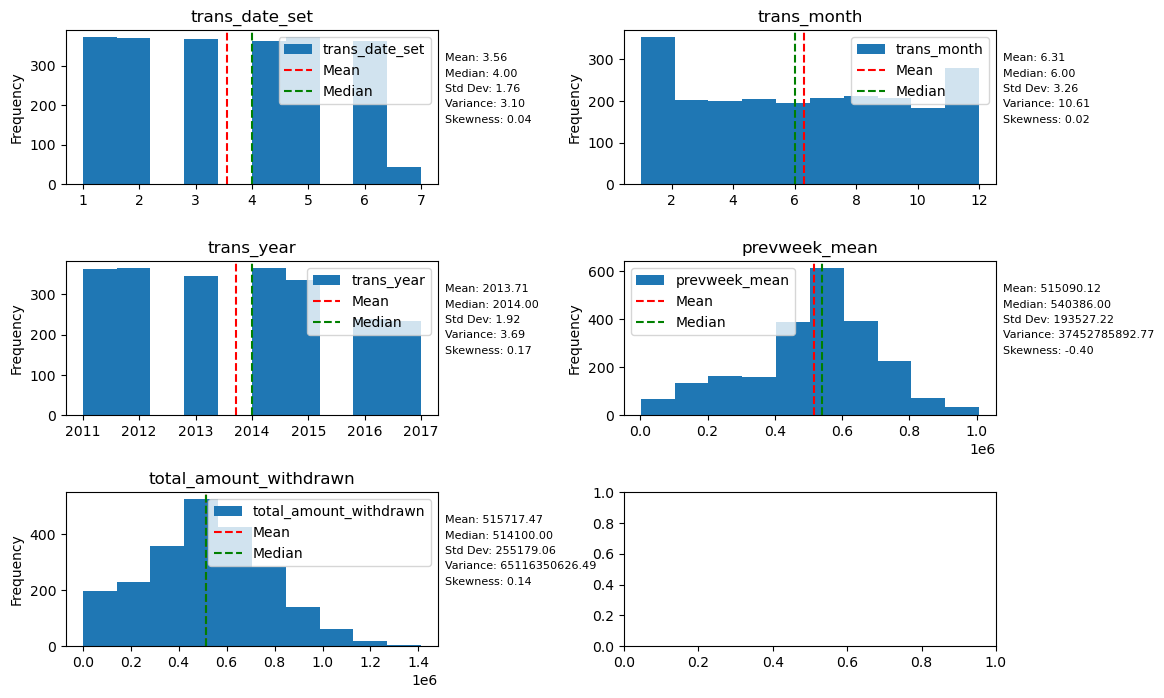

In [6]:
# Filter numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=np.number).columns

# Calculate statistics for each numeric column
statistics = df[numeric_columns].describe()

# Plot the histograms with subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i, column in enumerate(numeric_columns):
    ax = axes[i // 2, i % 2]
    df[column].plot(kind='hist', ax=ax)
    ax.set_title(column)
    
    # Add vertical lines for mean and median
    ax.axvline(x=statistics.loc['mean', column], color='r', linestyle='--', label='Mean')
    ax.axvline(x=statistics.loc['50%', column], color='g', linestyle='--', label='Median')
    
    # Add text labels for statistics outside the plot
    ax.text(1.02, 0.8, f"Mean: {statistics.loc['mean', column]:.2f}", transform=ax.transAxes, fontsize=8)
    ax.text(1.02, 0.7, f"Median: {statistics.loc['50%', column]:.2f}", transform=ax.transAxes, fontsize=8)
    ax.text(1.02, 0.6, f"Std Dev: {statistics.loc['std', column]:.2f}", transform=ax.transAxes, fontsize=8)
    ax.text(1.02, 0.5, f"Variance: {statistics.loc['std', column]**2:.2f}", transform=ax.transAxes, fontsize=8)
    ax.text(1.02, 0.4, f"Skewness: {df[column].skew():.2f}", transform=ax.transAxes, fontsize=8)

    ax.legend()

plt.show()


The histogram plot above displays the distributions of numerical columns in the dataset, with additional information about their mean and median values. Each histogram represents a different numerical column, and the legend provides valuable statistical insights for each distribution.

Mean (μ): The mean represents the average value of the data distribution. It is calculated as the sum of all values divided by the number of data points. The mean provides a measure of the central tendency of the data.

Median (M): The median is the middle value of the data when it is sorted in ascending order. It is a robust measure of the central tendency and is not affected by extreme values or outliers.

Standard Deviation (σ): The standard deviation measures the spread or dispersion of the data points around the mean. It quantifies the amount of variation or volatility in the dataset.

Variance (σ^2): The variance is the square of the standard deviation and provides another measure of the spread of data points. Larger variance indicates greater data dispersion.

Skewness: Skewness measures the asymmetry of the data distribution. Positive skewness means the tail is stretched towards the right, while negative skewness indicates a longer tail towards the left.

By observing the histogram plots and comparing the mean and median values, we can infer the shape and symmetry of each distribution. When the mean and median are close to each other, the distribution is approximately symmetric. If the mean is greater than the median, it indicates positive skewness, and if the mean is less than the median, it indicates negative skewness.

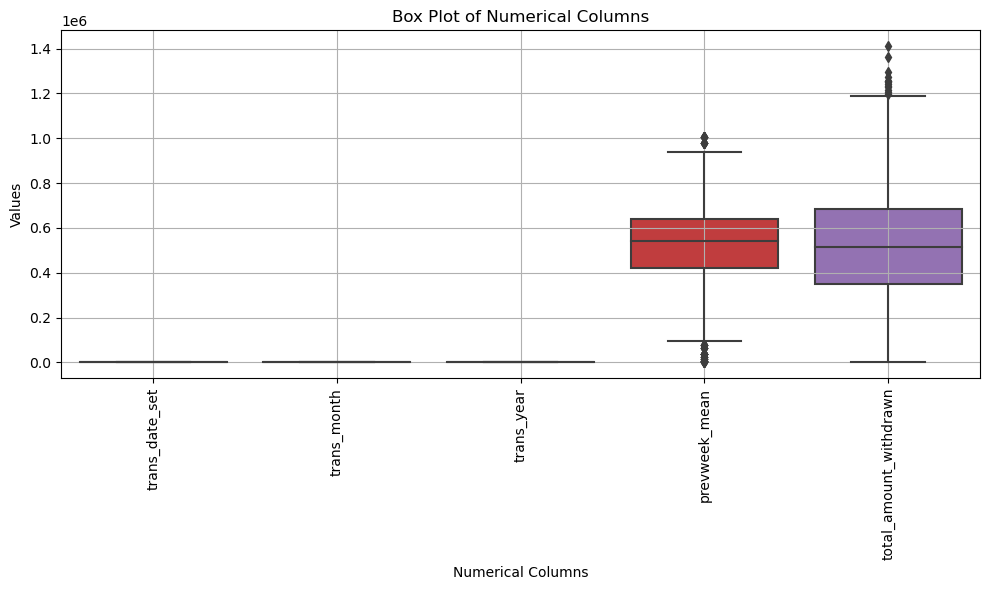

In [7]:
# Assuming 'df' is the DataFrame with the desired numerical columns for the box plot
numerical_columns = df.select_dtypes(include="number").columns

# Create a box plot using Seaborn
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df[numerical_columns])
plt.xticks(rotation=90)
plt.xlabel('Numerical Columns')
plt.ylabel('Values')
plt.title('Box Plot of Numerical Columns')
plt.grid(True)
plt.tight_layout()
plt.show()


The box plots above reveal the presence of outliers in the "Previous Week Mean" and "Total Amount Withdrawn" columns. For the "Previous Week Mean," the outlier value is 63, and for the "Total Amount Withdrawn," the outlier value is 13. These outliers are indicated by the points that lie outside the whiskers of the box plots. Outliers are data points that significantly deviate from the rest of the data, and they can have a considerable impact on statistical analyses and modeling. Identifying and handling outliers appropriately is crucial to ensure the accuracy and reliability of the data analysis.

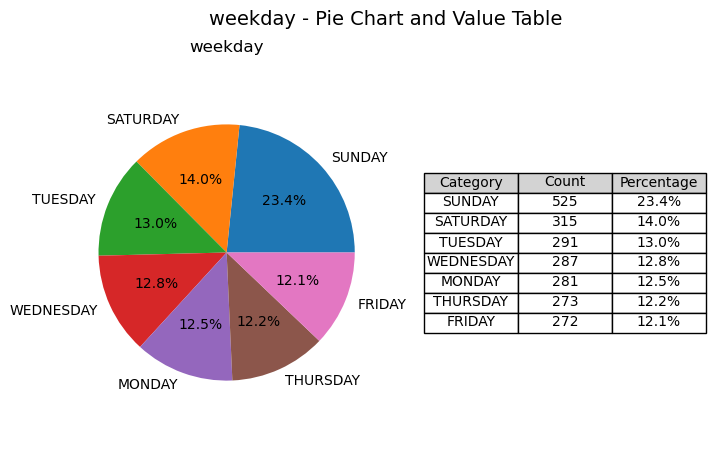

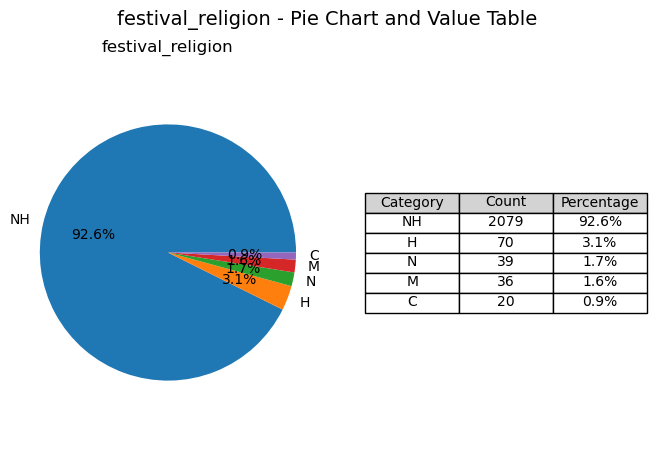

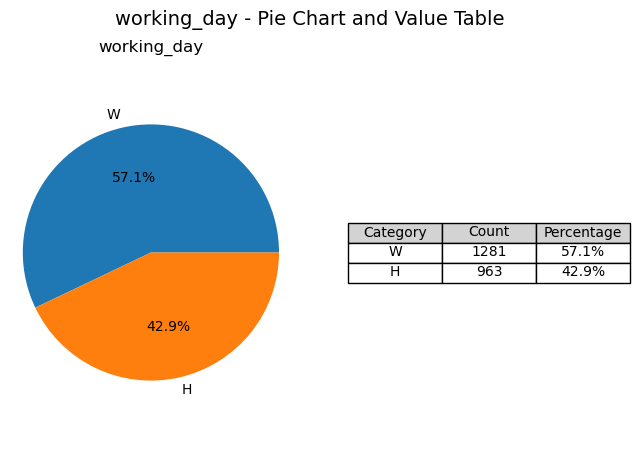

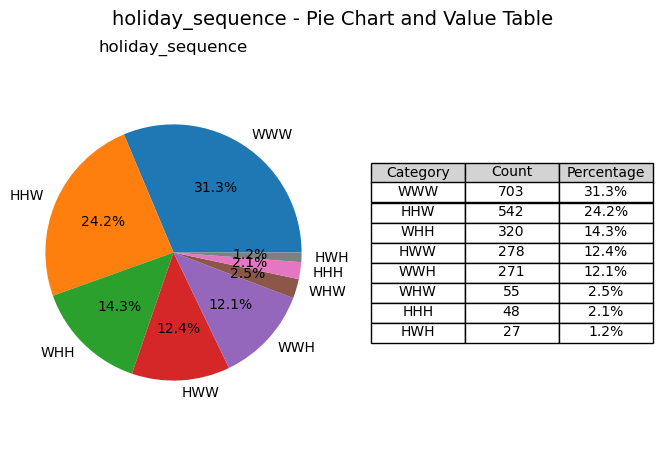

In [8]:
# Assuming 'atm' is a DataFrame with the desired columns for the pie charts
columns = df.select_dtypes(include="object").columns

for column in columns:
    counts = df[column].value_counts()
    total_count = len(df)  # Calculate the total count of items in the DataFrame

    plt.figure(figsize=(8, 5))

    # Create the pie chart
    plt.subplot(1, 2, 1)
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
    plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
    plt.title(column)

    # Create the table with values
    plt.subplot(1, 2, 2)
    cell_text = []
    for i, count in enumerate(counts):
        percentage = count / total_count * 100
        cell_text.append([f'{counts.index[i]}', f'{count}', f'{percentage:.1f}%'])

    table = plt.table(cellText=cell_text, colLabels=['Category', 'Count', 'Percentage'], loc='center', cellLoc='center', colColours=['lightgray']*3)
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.2)  # Adjust the size of the table

    plt.axis('off')  # Turn off axis for the table

    plt.suptitle(f'{column} - Pie Chart and Value Table', fontsize=14)
    plt.show()


The pie plots above illustrate the distribution of weekdays, festival religion, working days, and holiday sequences. Each pie chart shows the count and percentage of occurrences for the respective categories.

In the first pie chart, we observe the distribution of weekdays, where each slice represents a specific weekday (e.g., Monday, Tuesday, etc.). The size of each slice corresponds to the count of occurrences for that particular weekday, and the percentage displayed within the slice indicates the proportion of occurrences relative to the total count of weekdays.

The second pie chart represents the distribution of festival religion categories. Each slice represents a specific festival religion (e.g., Hindu, Muslim, etc.), and its size indicates the count of occurrences for that religion. The percentage displayed within each slice denotes the proportion of occurrences of that religion compared to the overall count of festival religions.

The third pie chart illustrates the distribution of working days and non-working days (holidays). One slice represents the count of working days, and the other slice represents the count of holidays. The percentages within the slices indicate the proportion of working days and holidays relative to the total count of occurrences.

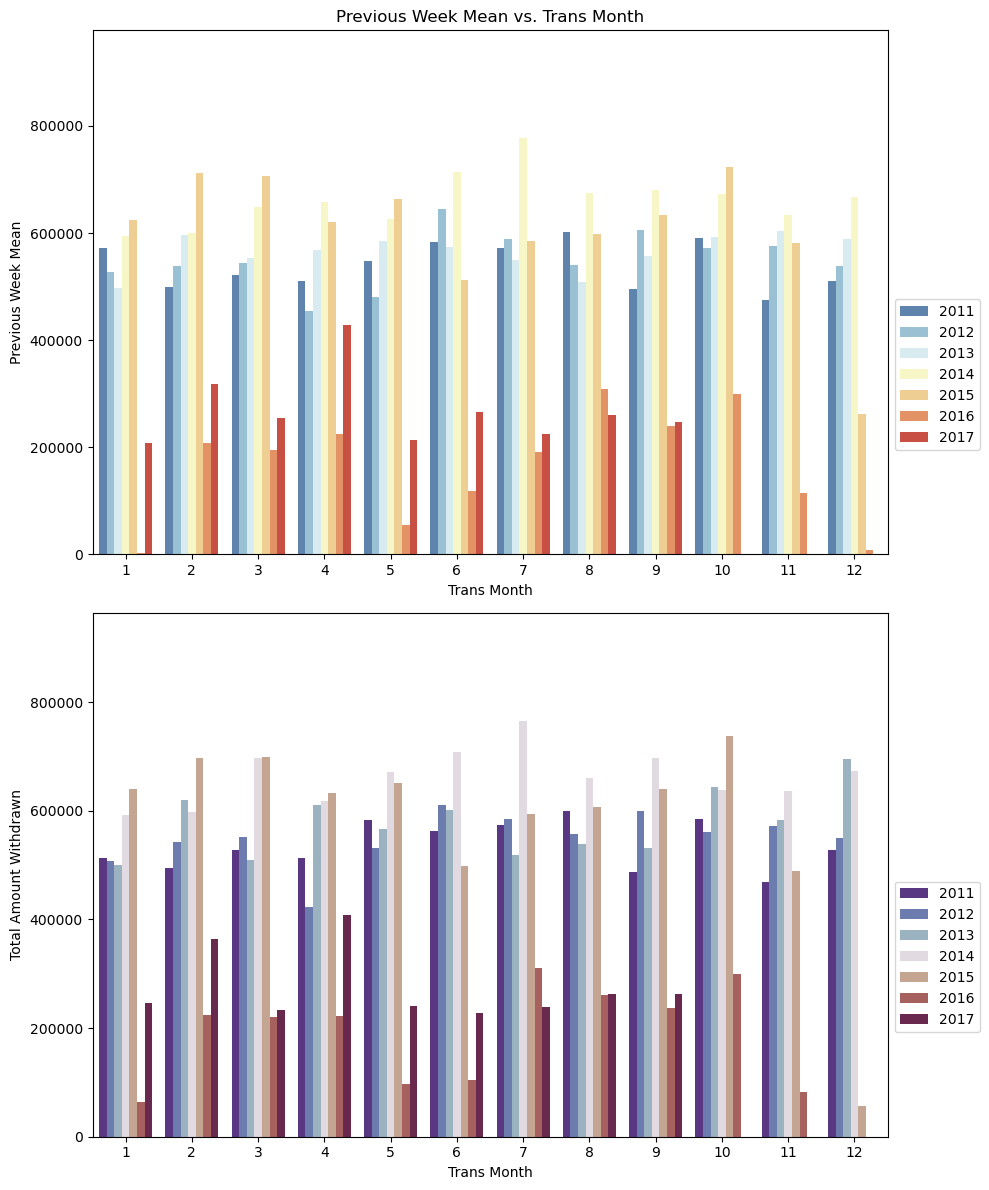

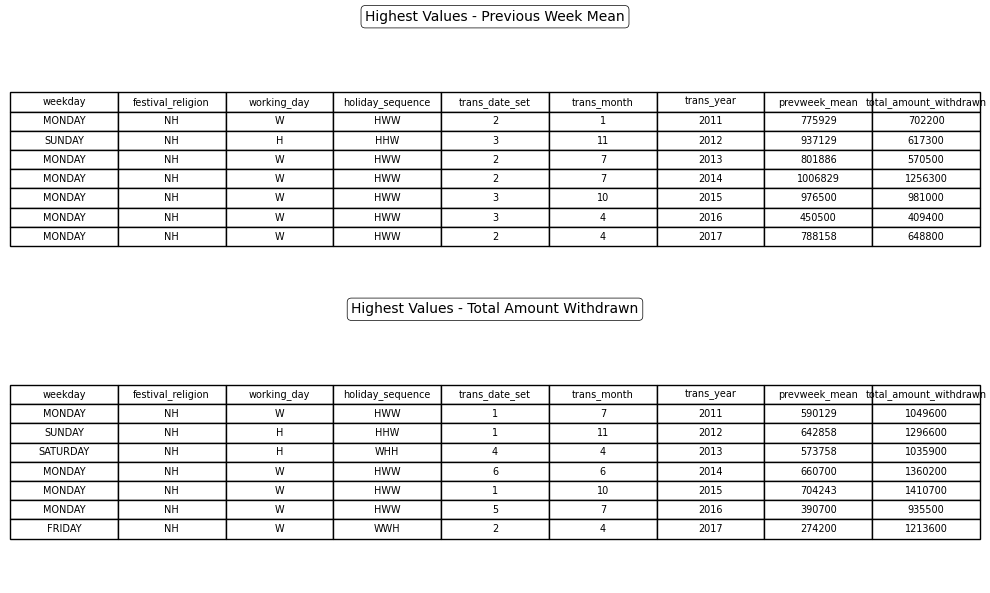

In [9]:
import pandas as pd

# Assuming 'atm' is a DataFrame with the desired columns for the bar plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot the bar chart and get highest values for each year
highest_values1 = df.loc[df.groupby('trans_year')['prevweek_mean'].idxmax()]
bar_plot1 = sns.barplot(data=df, x="trans_month", y='prevweek_mean', hue="trans_year", palette="RdYlBu_r", ax=ax1, ci=None)

# Set the labels and title for the bar chart
ax1.set_xlabel('Trans Month')
ax1.set_ylabel('Previous Week Mean')
ax1.set_title('Previous Week Mean vs. Trans Month')
ax1.legend(loc='upper left', bbox_to_anchor=(1, 0.5))

# Set y-axis limits to better accommodate the annotations
ax1.set_ylim(top=ax1.get_ylim()[1] * 1.2)

# Plot the line chart and get highest values for each year
highest_values2 = df.loc[df.groupby('trans_year')['total_amount_withdrawn'].idxmax()]
bar_plot2 = sns.barplot(data=df, x="trans_month", y='total_amount_withdrawn', hue="trans_year", palette="twilight_shifted", ax=ax2, ci=None)

# Set the labels for the line chart
ax2.set_xlabel('Trans Month')
ax2.set_ylabel('Total Amount Withdrawn')
ax2.legend(loc='upper left', bbox_to_anchor=(1, 0.5))

# Set y-axis limits to better accommodate the annotations
ax2.set_ylim(top=ax2.get_ylim()[1] * 1.2)

plt.tight_layout()
plt.show()

# Create tables for highest values
fig, (ax3, ax4) = plt.subplots(2, 1, figsize=(10, 6))

table1 = ax3.table(cellText=highest_values1.values, colLabels=highest_values1.columns, cellLoc='center', loc='center')
table1.auto_set_font_size(False)
table1.set_fontsize(7)

bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.5)
ax3.annotate("Highest Values - Previous Week Mean", xy=(0, 0), xytext=(0.5, 1.1), ha='center', va='bottom', xycoords='axes fraction', textcoords='axes fraction', fontsize=10, bbox=bbox_props)

ax3.axis('off')  # Turn off axis for the table

table2 = ax4.table(cellText=highest_values2.values, colLabels=highest_values2.columns, cellLoc='center', loc='center')
table2.auto_set_font_size(False)
table2.set_fontsize(7)

ax4.annotate("Highest Values - Total Amount Withdrawn", xy=(0, 0), xytext=(0.5, 1.1), ha='center', va='bottom', xycoords='axes fraction', textcoords='axes fraction', fontsize=10, bbox=bbox_props)

ax4.axis('off')  # Turn off axis for the table

plt.tight_layout()
plt.show()


The first bar plot illustrates the "Previous Week Mean" values across different months for various years. In January 2011, the mean value was approximately 7,75,000. This value increased to around 9,37,000 in November 2012 but decreased to approximately 8,00,000 in July 2013. Subsequently, it rose again to about 10,00,000 in July 2014 and remained close to 9,76,000 in October 2015. However, there was a significant drop in April 2016, with a value of 4,50,000, but it rebounded in April 2017 to about 7,88,000. The plot shows fluctuations in the "Previous Week Mean" over the years and months, indicating the varying trends in withdrawals.

The second bar plot displays the "Total Amount Withdrawn" for different months across various years. In July 2011, the total amount withdrawn was approximately 10,49,000. This value increased to around 12,96,000 in November 2012 and decreased to approximately 10,35,000 in April 2013. Subsequently, it rose again to about 13,60,000 in June 2014 and further increased to around 14,10,000 in October 2015. However, there was a decline in July 2016, with a value of 9,35,000, followed by a slight increase in April 2017 to about 12,13,000. The plot shows the variations in the "Total Amount Withdrawn" over the years and months, indicating the changing withdrawal patterns.

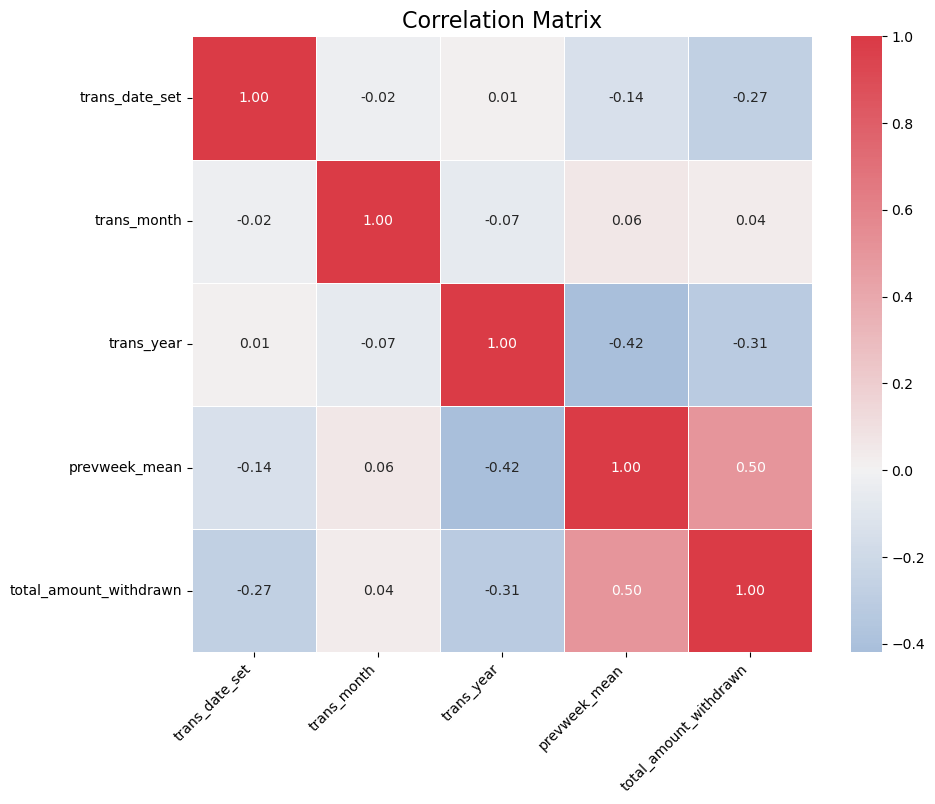

In [10]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a custom diverging color map
cmap = sns.diverging_palette(250, 10, as_cmap=True)

# Set the figure size
plt.figure(figsize=(10, 8))

# Plot the heatmap using imshow to create a mappable for the color bar
heatmap = sns.heatmap(corr_matrix, annot=True, cmap=cmap, center=0, linewidths=0.5, fmt=".2f", annot_kws={"size": 10})

# Set the title
plt.title('Correlation Matrix', fontsize=16)

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=45, ha='right')

# Rotate the y-axis tick labels for better readability
plt.yticks(rotation=0)

# Adjust the font size of the color bar
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)

# Show the plot
plt.show()


The heatmap reveals a strong positive correlation between "Previous Week Mean" and "Total Amount Withdrawn," indicating that as the "Previous Week Mean" increases, the "Total Amount Withdrawn" also tends to increase. On the other hand, the weakest correlation is observed between "Previous Week Mean" and "Trans Year," suggesting that there is little to no linear relationship between these two variables.






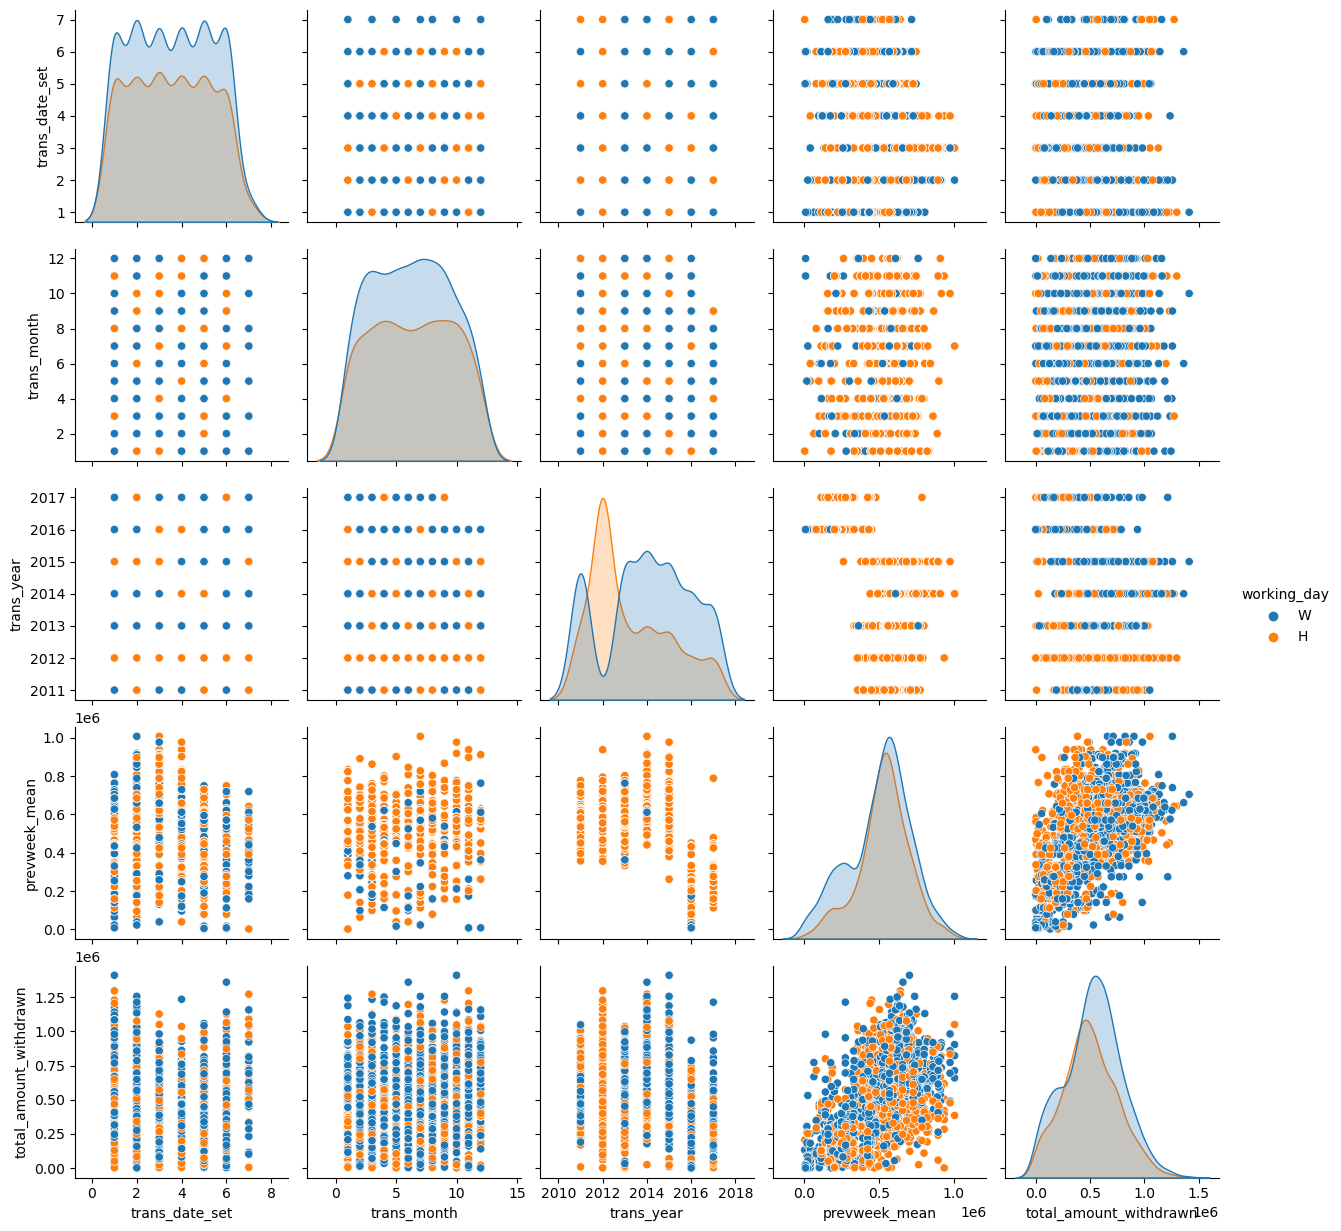

In [11]:
sns.pairplot(df,hue="working_day")

In [12]:
#categorical to numerical
df=pd.get_dummies(df,columns=['weekday','festival_religion','working_day','holiday_sequence'])
df.shape

(2244, 27)

After OHE we have 2244 observations with 27 columns (features).

<Axes: >

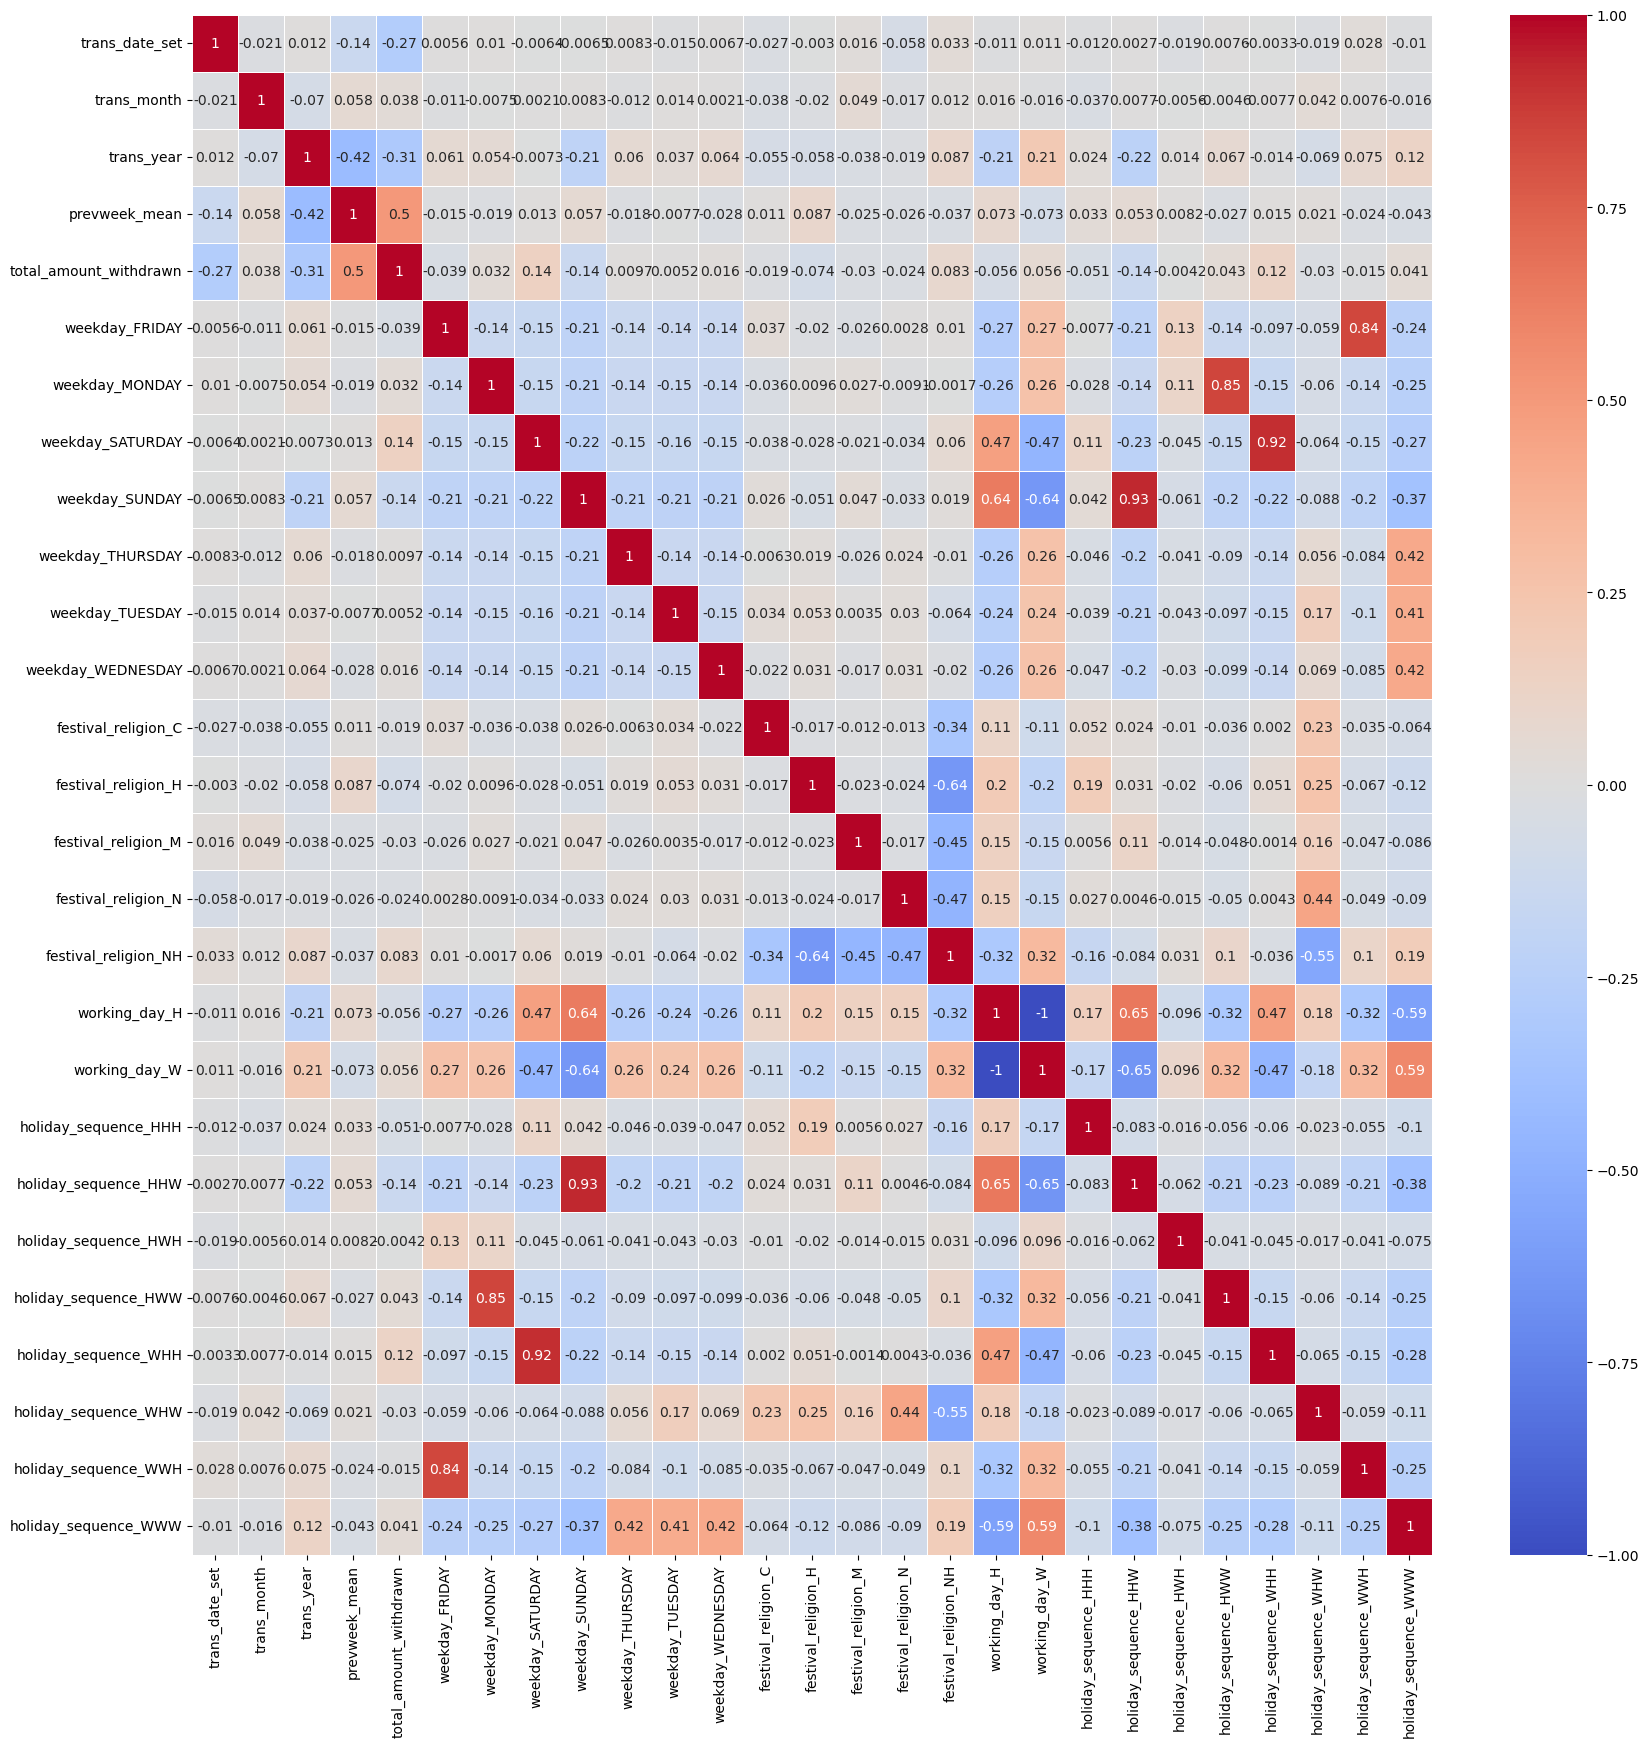

In [13]:
#heatmap of correlation between each variable
corr=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",linecolor="white",linewidth=0.5)

In [14]:
#selecting one feature amoung highly correlated varible
# Create a boolean array to keep track of selected columns
columns = np.full((corr.shape[0],), True, dtype=bool)
# Iterate through the correlation matrix
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        # Check if the correlation between variables is greater than or equal to 0.9
        if corr.iloc[i, j] >= 0.9:
            # Check if the column j hasn't been marked as False already
            if columns[j]:
                # Set column j as False to indicate it should not be selected
                columns[j] = False

# Select the columns based on the boolean array
selected_columns = df.columns[columns]

# Create a new DataFrame with the selected columns
df1 = df[selected_columns]


In [15]:
df1

,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn,weekday_FRIDAY,weekday_MONDAY,weekday_SATURDAY,weekday_SUNDAY,weekday_THURSDAY,...,festival_religion_N,festival_religion_NH,working_day_H,working_day_W,holiday_sequence_HHH,holiday_sequence_HWH,holiday_sequence_HWW,holiday_sequence_WHW,holiday_sequence_WWH,holiday_sequence_WWW
0,1,1,2011,648600,897100,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1,1,1,2011,648600,826000,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,1,1,2011,648600,754400,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,2,1,2011,648600,834200,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
4,2,1,2011,648600,575300,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2239,5,9,2017,276058,447400,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2240,6,9,2017,276058,153800,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2241,6,9,2017,276058,167100,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2242,6,9,2017,276058,317400,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Splitting the data into features (x) and target variable (y)
x = df1.drop(columns=['total_amount_withdrawn'])
y = df1['total_amount_withdrawn']

# Splitting the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20)

# Printing the shapes of the training and testing sets
print("xtrain shape:", xtrain.shape)
print("xtest shape:", xtest.shape)
print("ytrain shape:", ytrain.shape)
print("ytest shape:", ytest.shape)

# Initializing the StandardScaler for feature scaling
sc = StandardScaler()

# Scaling the features
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

# Scaling the target variable
ytrain = sc.fit_transform(ytrain.values.reshape(-1, 1))
ytest = sc.transform(ytest.values.reshape(-1, 1))


xtrain shape: (1795, 24)
xtest shape: (449, 24)
ytrain shape: (1795,)
ytest shape: (449,)


# Linear Regression


In [17]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)
pred=model.predict(xtest)
#calculating RMSE,MSE,MAE and r2_score
from sklearn import metrics
MAE_lr=metrics.mean_absolute_error(ytest,pred)
MSE_lr=metrics.mean_squared_error(ytest,pred)
RMSE_lr=np.sqrt(MSE_lr)
r2_lr=metrics.r2_score(ytest,pred)
# Print the results
print("LinearRegression:")
print("Mean Absolute Error:", MAE_lr)
print("Mean Squared Error:", MSE_lr)
print("Root Mean Squared Error:", RMSE_lr)
print("R-squared:", r2_lr)


LinearRegression:
Mean Absolute Error: 0.6484800133073774
Mean Squared Error: 0.6849206960828627
Root Mean Squared Error: 0.8275993572271928
R-squared: 0.37328881941002257


# RandomForestRegressor

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Create and fit the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(xtrain, ytrain)

# Make predictions on the test data
rf_pred = rf_model.predict(xtest)

# Calculate evaluation metrics
MAE_rf = metrics.mean_absolute_error(ytest, rf_pred)
MSE_rf = metrics.mean_squared_error(ytest, rf_pred)
RMSE_rf = np.sqrt(MSE_rf)
r2_rf = metrics.r2_score(ytest, rf_pred)

# Print the results
print("Random Forest Regressor:")
print("Mean Absolute Error:", MAE_rf)
print("Mean Squared Error:", MSE_rf)
print("Root Mean Squared Error:", RMSE_rf)
print("R-squared:", r2_rf)


Random Forest Regressor:
Mean Absolute Error: 0.565750792489809
Mean Squared Error: 0.549150390881938
Root Mean Squared Error: 0.741046820978228
R-squared: 0.4975203819079368


# XGBoost Regression

In [19]:
import xgboost as xgb
from sklearn import metrics
model_xgb=xgb.XGBRegressor()
model_xgb.fit(xtrain,ytrain)
pred=model_xgb.predict(xtest)
MAE_xb=metrics.mean_absolute_error(ytest,pred)
MSE_xb=metrics.mean_squared_error(ytest,pred)
RMSE_xb=np.sqrt(MSE_xb)
r2_xb=metrics.r2_score(ytest,pred)
# Print the results
print("XGBRegressor:")
print("Mean Absolute Error:", MAE_xb)
print("Mean Squared Error:", MSE_xb)
print("Root Mean Squared Error:", RMSE_xb)
print("R-squared:", r2_xb)


XGBRegressor:
Mean Absolute Error: 0.5779653800668911
Mean Squared Error: 0.5815731698689091
Root Mean Squared Error: 0.7626094477967795
R-squared: 0.4678531252267717


# Support Vector Regression

In [20]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(xtrain,ytrain)
y_pred = regressor.predict(xtest)
MAE_svr=metrics.mean_absolute_error(ytest,y_pred)
MSE_svr=metrics.mean_squared_error(ytest,y_pred)
RMSE_svr=np.sqrt(MSE_svr)
r2_svr=metrics.r2_score(ytest,y_pred)
# Print the results
print("SVRegressor:")
print("Mean Absolute Error:", MAE_svr)
print("Mean Squared Error:", MSE_svr)
print("Root Mean Squared Error:", RMSE_svr)
print("R-squared:", r2_svr)

SVRegressor:
Mean Absolute Error: 0.5905632398086236
Mean Squared Error: 0.6101105758195644
Root Mean Squared Error: 0.7810957532976123
R-squared: 0.4417410344743746


# ANN

In [21]:
# Importing the required libraries and packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
# Initializing the regressor
regressor = Sequential()

# Adding the input layer and the first hidden layer
regressor.add(Dense(units=64, input_dim=24))
regressor.add(BatchNormalization())
regressor.add(LeakyReLU())
regressor.add(Dropout(0.2))

# Adding more hidden layers
regressor.add(Dense(units=128))
regressor.add(BatchNormalization())
regressor.add(LeakyReLU())
regressor.add(Dropout(0.2))
regressor.add(Dense(units=128))
regressor.add(BatchNormalization())
regressor.add(LeakyReLU())
regressor.add(Dropout(0.2))
regressor.add(Dense(units=64))
regressor.add(BatchNormalization())
regressor.add(LeakyReLU())
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units=1, activation='linear'))
print(regressor.summary())
# Compiling the regressor
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Applying early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)

# Fitting the regressor to the training set
regressor.fit(xtrain, ytrain, batch_size=100, epochs=500, validation_data=(xtest, ytest), callbacks=[early_stopping])

# Making predictions and evaluating the model
y_pred = regressor.predict(xtest)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1600      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64)                0         
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                        

18/18 [==============================] - 0s 5ms/step - loss: 0.5240 - val_loss: 0.5546
Epoch 54/500
18/18 [==============================] - 0s 6ms/step - loss: 0.5187 - val_loss: 0.5502
Epoch 55/500
18/18 [==============================] - 0s 6ms/step - loss: 0.5373 - val_loss: 0.5547
Epoch 56/500
18/18 [==============================] - 0s 5ms/step - loss: 0.5309 - val_loss: 0.5526
Epoch 57/500
18/18 [==============================] - 0s 5ms/step - loss: 0.5135 - val_loss: 0.5523
Epoch 58/500
18/18 [==============================] - 0s 5ms/step - loss: 0.5322 - val_loss: 0.5492
Epoch 59/500
18/18 [==============================] - 0s 6ms/step - loss: 0.5158 - val_loss: 0.5495
Epoch 60/500
18/18 [==============================] - 0s 5ms/step - loss: 0.5141 - val_loss: 0.5496
Epoch 61/500
18/18 [==============================] - 0s 6ms/step - loss: 0.5227 - val_loss: 0.5519
Epoch 62/500
18/18 [==============================] - 0s 6ms/step - loss: 0.5072 - val_loss: 0.5481
Epoch 63/500


In [22]:
from sklearn import metrics
# Calculate evaluation metrics
MAE_NN=metrics.mean_absolute_error(ytest, y_pred)
MSE_NN=metrics.mean_squared_error(ytest, y_pred)
RMSE_NN=np.sqrt(metrics.mean_squared_error(ytest, y_pred))
r2_NN=metrics.r2_score(ytest,y_pred)
# Print the evaluation metrics
print("Neural Network Model Evaluation:")
print("Mean Absolute Error:", MAE_NN)
print("Mean Squared Error:", MSE_NN)
print("Root Mean Squared Error:", RMSE_NN)
print("R-squared:", r2_NN)

Neural Network Model Evaluation:
Mean Absolute Error: 0.5565914971298179
Mean Squared Error: 0.532424024253
Root Mean Squared Error: 0.7296739163852576
R-squared: 0.5128252209016388


In [23]:
# Assuming you have calculated the evaluation metrics for each model
MAE = [MAE_lr, MAE_rf, MAE_xb, MAE_svr, MAE_NN]
MSE = [MSE_lr, MSE_rf, MSE_xb, MSE_svr, MSE_NN]
RMSE = [RMSE_lr, RMSE_rf, RMSE_xb, RMSE_svr, RMSE_NN]
r2_score = [r2_lr, r2_rf, r2_xb, r2_svr, r2_NN]

# Create the dictionary with keys as column names and values as lists of evaluation metrics
data = {
    "MAE": MAE,
    "MSE": MSE,
    "RMSE": RMSE,
    "r2_score": r2_score
}

# Create the DataFrame
ind = ['Linear regression', "RandomForestRegressor", 'XGBoost Regression', 'Support Vector Regression', 'ANN']
result = pd.DataFrame(data=data, index=ind)

# Display the result DataFrame
result


,MAE,MSE,RMSE,r2_score
Linear regression,0.648480,0.684921,0.827599,0.373289
RandomForestRegressor,0.565751,0.549150,0.741047,0.497520
XGBoost Regression,0.577965,0.581573,0.762609,0.467853
Support Vector Regression,0.590563,0.610111,0.781096,0.441741
ANN,0.556591,0.532424,0.729674,0.512825


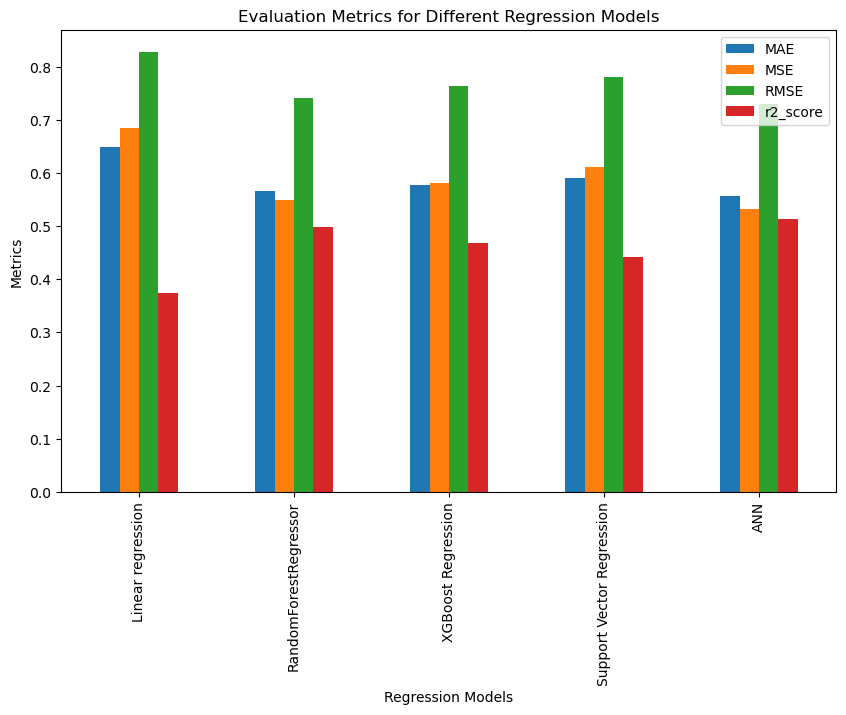

In [24]:
# Plot the bar chart
result.plot(kind='bar', figsize=(10, 6))

# Set the title and labels for the axes
plt.title("Evaluation Metrics for Different Regression Models")
plt.xlabel("Regression Models")
plt.ylabel("Metrics")

# Show the legend
plt.legend()

# Show the plot
plt.show()


# Obervations and Conclusion 

Observations:

The ANN (Artificial Neural Network) model outperformed the other regression models in terms of Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). It achieved the lowest values for these metrics, indicating better performance in predicting the target values.

The Random Forest Regressor and XGBoost Regression also performed reasonably well, showing competitive results compared to the ANN. However, they had slightly higher MAE, MSE, and RMSE values than the ANN.

The Linear Regression and Support Vector Regression models had higher MAE, MSE, and RMSE values compared to the other models, suggesting that they might not capture the underlying patterns in the data as effectively as the other models.

Regarding the coefficient of determination (r2_score), the ANN achieved the highest value, indicating that it explains a larger proportion of the variance in the target variable compared to the other models.

Conclusion:

Based on the evaluation metrics, the Artificial Neural Network (ANN) model appears to be the most effective in predicting the target variable. It outperformed the other regression models, including Linear Regression, Random Forest Regressor, XGBoost Regression, and Support Vector Regression.

The ANN's ability to capture complex relationships within the data, along with its flexibility in learning from large datasets, contributed to its superior performance. It demonstrated the lowest errors (MAE, MSE, and RMSE) and the highest coefficient of determination (r2_score), indicating that it provides more accurate predictions and explains a larger proportion of the target variable's variance.